# Lab N
### Morphology

Skimage morphology operators' documentation:
https://scikit-image.org/docs/dev/api/skimage.morphology.html

In [ ]:
from commonfunctions import *
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage.morphology import binary_erosion, binary_dilation, binary_closing,skeletonize, thin
from skimage.measure import find_contours
from skimage.draw import rectangle

# Show the figures / plots inside the notebook
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
'''
1) Erosion / Dilation:
    - Load "coins.jpg" from the img folder
    - Convert the image to binary
    - Write 2 functions each applying 1 of the erosion/dilation algorithms (with adjustable square window size) manually to the binary image
    - Use Skimage's "binary_erosion" & "binary_dilation" & show the results
'''


In [ ]:
'''
2) Case Study: Credit Card Number Extraction
    - Load "card.jpg" from the img folder
    - Convert the image to binary by brightness thresholding maintaining the card number details for extraction
    - Use your erosion/dilation functions, or Skimage's functions only if you didn't implement them, to apply closing
        Note: The goal of this step is to join the card number into 4 sets of connected pixels
    - Use Skimage's "find_contours" to get the bounding boxes for the credit card's numbers by filtering on aspect ratio (between 2.5 & 3.5)
        Note: When using "find_contours(img, 0.8)" the o/p is a list of contours each having:
                - contour[:,0] being the Y values of the contour perimeter points
                - contour[:,1] being the X values of the contour perimeter points
'''

# When provided with the correct format of the list of bounding_boxes, this section will set all pixels inside boxes in img_with_boxes
for box in bounding_boxes:
    [Xmin, Xmax, Ymin, Ymax] = box
    rr, cc = rectangle(start=(Ymin, Xmin), end=(Ymax, Xmax), shape=img_gray.shape)
    img_with_boxes[rr, cc] = 1 # set color white

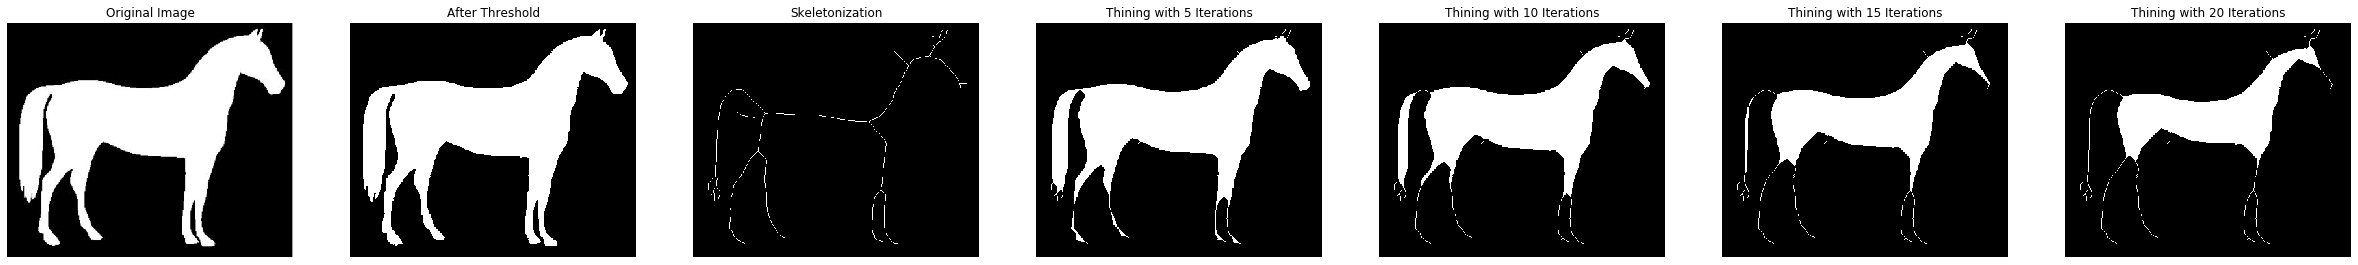

In [35]:
'''
3) Skeletonization:
    - Load "horse.jpg" from the img folder 
    - Use a binary threshold of 0.9 to remove invisible noise in the background
    - Use Skimage's "skeletonize(image)" to acquire the image's skeleton & show it
    - Use Skimage's "thin(image, max_iter)" with values of max_iter 5/10/15/20 & show it
'''
imgsArray = []
labelArray = []

horseImg = io.imread('img/horse.jpg',True)

imgsArray.append(horseImg)
labelArray.append("Original Image")

horseThresholdImg = horseImg > 0.9

imgsArray.append(horseThresholdImg)
labelArray.append("After Threshold")

skeletonizedImage = skeletonize(horseThresholdImg)

imgsArray.append(skeletonizedImage)
labelArray.append("Skeletonization")

maxItr5 = thin(horseThresholdImg,5)
maxItr10 = thin(horseThresholdImg,10)
maxItr15 = thin(horseThresholdImg,15)
maxItr20 = thin(horseThresholdImg,20)

imgsArray.append(maxItr5)
labelArray.append("Thining with 5 Iterations")
imgsArray.append(maxItr10)
labelArray.append("Thining with 10 Iterations")
imgsArray.append(maxItr15)
labelArray.append("Thining with 15 Iterations")
imgsArray.append(maxItr20)
labelArray.append("Thining with 20 Iterations")

show_images(imgsArray,labelArray)
